# List of Quadratic Uncostrained Binary Optimization formulations for

### - Maximum number of unconnected vertixes
### - Zero subset sum



#### QUBO (Quadratic Unconstrained Binary Optimization) is a type of optimization problem that involves finding the minimum value of a quadratic function subject to binary constraints. In other words, it involves finding the best possible combination of binary variables that minimizes the value of a quadratic equation.
#### The QUBO optimization process involves transforming the original problem into a mathematical model that can be solved using a quantum computer. This is done by converting the quadratic equation into a matrix of binary variables, which can then be manipulated using quantum algorithms.
#### The main advantage of QUBO optimization is that it can be used to solve problems that are too complex for classical computers to handle. This is because quantum computers are able to perform calculations much faster than classical computers, making it possible to solve problems that would otherwise be impossible to solve.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from itertools import product

In [44]:
def create_rand_matrix(N=5,N_edge_min=5):
    
    # create random graph with N verixes
    # N - [int] - number of nodes, shape of maxrit
    # N_vert_min - [int] - minimal number of Graph edges
    
    A = np.zeros([N,N]).astype(int)
    for _ in range(N_edge_min): 
        i = np.random.randint(N)
        j = np.random.randint(N)
        A[i,j] = A[j,i] = 1  #make it symmetrical
        
    #diagonal must be zero as there is no self connections
    
    for i in range(N):
        A[i,i] = 0
        
    #for lone vertixes we will add some edges
    
    for i in range(N):
        if sum(A)[i] == 0:
            j = np.random.randint(N)
            
        # no self connections
        while(j==i):
            j=np.random.randint(N)
        A[i,j] = A[j,i] = 1
        
    Graph = nx.from_numpy_array(A) #make a Graph from matrix/array
    nx.draw_networkx(Graph, with_labels=True) #draw a graph
    
    return A

def best_solution(QUBO):
    
    # bruteforcing QUBO matrix to find global minimum
    # QUBO - [2-d array] 
    
    count = 0
    N = QUBO.shape[0]
    arr = np.array(list(product([0,1], repeat=N)))
    min_ = 10 * 8
    min_id = 0
    for i,z in enumerate(arr):
        y = np.dot(z,QUBO).dot(z.T)
        if y == min_:
            count += 1
            solutions.append(z)
            
        if y < min_:
            
            solutions = [z]
            min_id = i
            min_ = y
            count = 0
    
    print('Correct Solutions')
    print(*solutions)
    return arr[min_id]

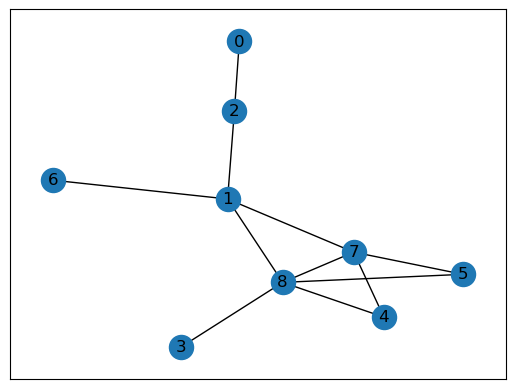

In [36]:
Graph = create_rand_matrix(9)

## Problem 1 - Maximum ammount of unconnected vertices

### Given a graph G with n vertices and kdges.What is the maximum number of vertices such that no edge exists between any vertices in this set.

From side of QUBO formulation 1 - node is taken to the set, 0 - isn't. So out goal is to find set of maximum length. If vertices a and b have a connection between them in Graph matrix it will be marked as 1 multiplying this result on some penalty we will forbid out alghorithm to take both of this elements to set.
$$ pen*\sum_{i=0}^{n}\sum_{j=0}^{n}a_{i}a_{j}\\
a_i\in {\{ 0,1 \}} $$

[[   0.    0. 1000.    0.    0.    0.    0.    0.    0.]
 [   0.    0. 1000.    0.    0.    0. 1000. 1000. 1000.]
 [1000. 1000.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0. 1000.]
 [   0.    0.    0.    0.    0.    0.    0. 1000. 1000.]
 [   0.    0.    0.    0.    0.    0.    0. 1000. 1000.]
 [   0. 1000.    0.    0.    0.    0.    0.    0.    0.]
 [   0. 1000.    0.    0. 1000. 1000.    0.    0. 1000.]
 [   0. 1000.    0. 1000. 1000. 1000.    0. 1000.    0.]]
Correct Solutions
[0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 1 0 0] [0 0 0 0 0 0 1 0 1] [0 0 0 0 0 0 1 1 0] [0 0 0 0 0 1 0 0 0] [0 0 0 0 0 1 1 0 0] [0 0 0 0 1 0 0 0 0] [0 0 0 0 1 0 1 0 0] [0 0 0 0 1 1 0 0 0] [0 0 0 0 1 1 1 0 0] [0 0 0 1 0 0 0 0 0] [0 0 0 1 0 0 0 1 0] [0 0 0 1 0 0 1 0 0] [0 0 0 1 0 0 1 1 0] [0 0 0 1 0 1 0 0 0] [0 0 0 1 0 1 1 0 0] [0 0 0 1 1 0 0 0 0] [0 0 0 1 1 0 1 0 0] [0 0 0 1 1 1 0 0 0] [0 0 0 1 1 1 1 0 0] [0 0 1 0 0 0 0 0 0] [0 0 1 0

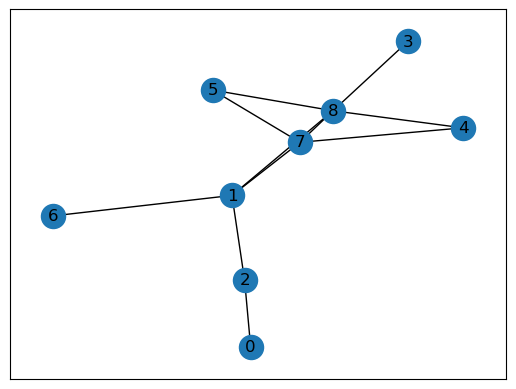

In [45]:
G=Graph
nx.draw_networkx(nx.from_numpy_array(G), with_labels=True)

def nodes_not_correct(G):
    
    # G - [int array] - graph matrix
    
    S = 1e3 # penalty
    QUBO = S*G 
    
    return QUBO

QUBO_not_correct = nodes_not_correct(G)
print(QUBO_not_correct)
z = best_solution(QUBO_not_correct)
print(f'{"z by enum":15} ==> {z.tolist()}')
temp=[]
for i in range(z.shape[0]):
    if z[i]==1: 
        temp.append(i)
print(temp)


As we see solution is incorrect our brute force alghorithm didn't pickup any node, this has happend because for alg it's more profitably to don't pick any element to rich global minimum, so we need to add some penalty which wiil force alg to pick maximum possible number of elements

$$ pen*\sum_{i=0}^{n}\sum_{j=0}^{n}a_{i}a_{j}-\sum_{i=0}^{n}\sum_{j=i}^{n}a_{i}a_{j}*n\\
a_i\in {\{ 0,1 \}}$$

[[ -9.  -9. 991.  -9.  -9.  -9.  -9.  -9.  -9.]
 [ -9.  -9. 991.  -9.  -9.  -9. 991. 991. 991.]
 [991. 991.  -9.  -9.  -9.  -9.  -9.  -9.  -9.]
 [ -9.  -9.  -9.  -9.  -9.  -9.  -9.  -9. 991.]
 [ -9.  -9.  -9.  -9.  -9.  -9.  -9. 991. 991.]
 [ -9.  -9.  -9.  -9.  -9.  -9.  -9. 991. 991.]
 [ -9. 991.  -9.  -9.  -9.  -9.  -9.  -9.  -9.]
 [ -9. 991.  -9.  -9. 991. 991.  -9.  -9. 991.]
 [ -9. 991.  -9. 991. 991. 991.  -9. 991.  -9.]]
Correct Solutions
[0 0 1 1 1 1 1 0 0] [1 0 0 1 1 1 1 0 0] [1 1 0 1 1 1 0 0 0]
[2, 3, 4, 5, 6]


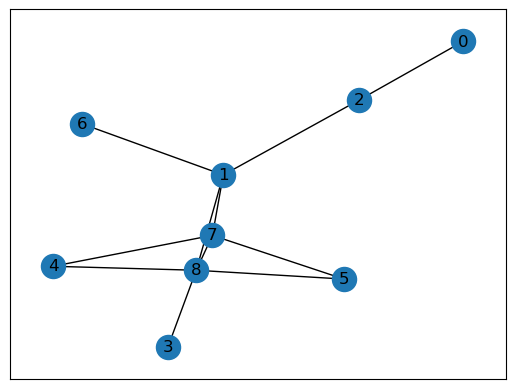

In [47]:
G=Graph
nx.draw_networkx(nx.from_numpy_array(G), with_labels=True)

def maximum_amount_nodes(G):
    
    # G - [int array] - graph matrix
    
    S = 1e3 # penalty
    QUBO = S * G - G.shape[0]
    
    return QUBO

QUBO_not_correct = maximum_amount_nodes(G)
print(QUBO_not_correct)

z = best_solution(QUBO_not_correct)
temp=[]
for i in range(z.shape[0]):
    if z[i]==1: 
        temp.append(i)
print(temp)

## Zero subset sum

In this problem we need to pickup k list elements to get the sum of set maximum close to 0

$$ \sum_{i=0}^{n}\sum_{j=0}^{n}(s_{i}+s_{j})^{2} \Longrightarrow 0 \\
\sum_{i=0}^{n}\sum_{j=0}^{n}(s_{i}+s_{j})^{2}=\sum_{i=0}^{n}\sum_{j=0}^{n}s_{i}^{2}+s_{j}^2+2s_{i}s_{j} \\
\text{this is just matrix, which is dot product of list elements, but we have no self connections}
\\ \text{So we get:} \\
\sum_{i=0}^{n}\sum_{j=0}^{n}2s_{i}s_{j} \\
\text{To take only k elements we need make same trick as in previous problem} \\
QUBO = \sum_{i=0}^{n}\sum_{j=0}^{n}2s_{i}s_{j} - pen*k\sum_{i=0}^{n}\sum_{j=i}^{n}s_{i} $$


In [67]:
def generate_s(n):
    S = []
    for i in range(n):
        S.append(np.random.randint(-100, 100))
    return S
S = generate_s(7)
k = np.random.randint(3,len(S))    
S = np.array([S])

def sum_subset_zero(S,k):
    penalty= 1e3*(np.ones(len(S[0]))-2*k*np.eye(len(S[0])))
    QUBO=np.dot(S.T,S)+penalty
    return QUBO

print('Input array:',S[0])
print('k =',k)
res = best_solution(sum_subset_zero(S,k))
print('Sum = ',np.sum(res*S[0]))


Input array: [  6 -21 -52 -48  44  65   7]
k = 4
Correct Solutions
[0 1 1 0 0 1 1]
Sum =  -1
